## Telecom Churn Case Study
With 21 predictor variables we need to predict whether a particular customer will switch to another telecom provider or not. In telecom terminology, this is referred to as churning and not churning, respectively.

### Step 1: Importing and Merging Data

In [133]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')
from sklearn import metrics


In [134]:
# Importing Pandas and NumPy
import pandas as pd, numpy as np

In [135]:
# Importing all datasets
churn_data = pd.read_csv("C:/Users/ajanu/OneDrive/Desktop/study/churn_data.csv")
churn_data.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [136]:
customer_data = pd.read_csv("C:/Users/ajanu/OneDrive/Desktop/study/customer_data.csv")
customer_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


In [137]:
internet_data = pd.read_csv("C:/Users/ajanu/OneDrive/Desktop/study/internet_data.csv")
internet_data.head()

,customerID,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,No,Fiber optic,No,No,No,No,No,No


#### Combining all data files into one consolidated dataframe

In [138]:
# Merging on 'customerID'
df_1 = pd.merge(churn_data, customer_data, how='inner', on='customerID')

In [139]:
# Final dataframe with all predictor variables
telecom = pd.merge(df_1, internet_data, how='inner', on='customerID')

### Step 2: Inspecting the Dataframe

In [140]:
# Let's see the head of our master dataset
telecom.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Female,...,Yes,No,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No,Male,...,No,No,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Male,...,No,No,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Male,...,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Female,...,No,No,No,Fiber optic,No,No,No,No,No,No


In [141]:
# Let's check the dimensions of the dataframe
telecom.shape

(7043, 21)

In [142]:
# let's look at the statistical aspects of the dataframe
telecom.describe()

,tenure,MonthlyCharges,SeniorCitizen
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,0.162147
std,24.559481,30.090047,0.368612
min,0.000000,18.250000,0.000000
25%,9.000000,35.500000,0.000000
50%,29.000000,70.350000,0.000000
75%,55.000000,89.850000,0.000000
max,72.000000,118.750000,1.000000


In [143]:
# Let's see the type of each column
telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   tenure            7043 non-null   int64  
 2   PhoneService      7043 non-null   object 
 3   Contract          7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
 8   Churn             7043 non-null   object 
 9   gender            7043 non-null   object 
 10  SeniorCitizen     7043 non-null   int64  
 11  Partner           7043 non-null   object 
 12  Dependents        7043 non-null   object 
 13  MultipleLines     7043 non-null   object 
 14  InternetService   7043 non-null   object 
 15  OnlineSecurity    7043 non-null   object 
 16  OnlineBackup      7043 non-null   object 


### Step 3: Data Preparation

#### Converting some binary variables (Yes/No) to 0/1

In [144]:
# List of variables to map

varlist =  ['PhoneService', 'PaperlessBilling', 'Churn', 'Partner', 'Dependents']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
telecom[varlist] = telecom[varlist].apply(binary_map)

In [145]:
telecom.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,0,Month-to-month,1,Electronic check,29.85,29.85,0,Female,...,1,0,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,1,One year,0,Mailed check,56.95,1889.5,0,Male,...,0,0,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2,1,Month-to-month,1,Mailed check,53.85,108.15,1,Male,...,0,0,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,45,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,Male,...,0,0,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2,1,Month-to-month,1,Electronic check,70.70,151.65,1,Female,...,0,0,No,Fiber optic,No,No,No,No,No,No


#### For categorical variables with multiple levels, create dummy features (one-hot encoded)

In [146]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy1 = pd.get_dummies(telecom[['Contract', 'PaymentMethod', 'gender', 'InternetService']], drop_first=True)

# Adding the results to the master dataframe
telecom = pd.concat([telecom, dummy1], axis=1)

In [147]:
telecom.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,StreamingTV,StreamingMovies,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Male,InternetService_Fiber optic,InternetService_No
0,7590-VHVEG,1,0,Month-to-month,1,Electronic check,29.85,29.85,0,Female,...,No,No,False,False,False,True,False,False,False,False
1,5575-GNVDE,34,1,One year,0,Mailed check,56.95,1889.5,0,Male,...,No,No,True,False,False,False,True,True,False,False
2,3668-QPYBK,2,1,Month-to-month,1,Mailed check,53.85,108.15,1,Male,...,No,No,False,False,False,False,True,True,False,False
3,7795-CFOCW,45,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,Male,...,No,No,True,False,False,False,False,True,False,False
4,9237-HQITU,2,1,Month-to-month,1,Electronic check,70.70,151.65,1,Female,...,No,No,False,False,False,True,False,False,True,False


In [148]:
# Creating dummy variables for the remaining categorical variables and dropping the level with big names.

# MultipleLines
ml = pd.get_dummies(telecom['MultipleLines'], prefix='MultipleLines')
ml1 = ml.drop(['MultipleLines_No phone service'], axis=1)
telecom = pd.concat([telecom, ml1], axis=1)

# OnlineSecurity
os = pd.get_dummies(telecom['OnlineSecurity'], prefix='OnlineSecurity')
os1 = os.drop(['OnlineSecurity_No internet service'], axis=1)
telecom = pd.concat([telecom, os1], axis=1)

# OnlineBackup
ob = pd.get_dummies(telecom['OnlineBackup'], prefix='OnlineBackup')
ob1 = ob.drop(['OnlineBackup_No internet service'], axis=1)
telecom = pd.concat([telecom, ob1], axis=1)

# DeviceProtection
dp = pd.get_dummies(telecom['DeviceProtection'], prefix='DeviceProtection')
dp1 = dp.drop(['DeviceProtection_No internet service'], axis=1)
telecom = pd.concat([telecom, dp1], axis=1)

# TechSupport
ts = pd.get_dummies(telecom['TechSupport'], prefix='TechSupport')
ts1 = ts.drop(['TechSupport_No internet service'], axis=1)
telecom = pd.concat([telecom, ts1], axis=1)

# StreamingTV
st = pd.get_dummies(telecom['StreamingTV'], prefix='StreamingTV')
st1 = st.drop(['StreamingTV_No internet service'], axis=1)
telecom = pd.concat([telecom, st1], axis=1)

# StreamingMovies
sm = pd.get_dummies(telecom['StreamingMovies'], prefix='StreamingMovies')
sm1 = sm.drop(['StreamingMovies_No internet service'], axis=1)
telecom = pd.concat([telecom, sm1], axis=1)


In [149]:
telecom.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
0,7590-VHVEG,1,0,Month-to-month,1,Electronic check,29.85,29.85,0,Female,...,False,True,True,False,True,False,True,False,True,False
1,5575-GNVDE,34,1,One year,0,Mailed check,56.95,1889.5,0,Male,...,True,False,False,True,True,False,True,False,True,False
2,3668-QPYBK,2,1,Month-to-month,1,Mailed check,53.85,108.15,1,Male,...,False,True,True,False,True,False,True,False,True,False
3,7795-CFOCW,45,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,Male,...,True,False,False,True,False,True,True,False,True,False
4,9237-HQITU,2,1,Month-to-month,1,Electronic check,70.70,151.65,1,Female,...,True,False,True,False,True,False,True,False,True,False


#### Dropping the repeated variables

In [150]:
telecom = telecom.drop(['Contract','PaymentMethod','gender','MultipleLines',
                        'InternetService','OnlineSecurity','OnlineBackup',
                        'DeviceProtection','TechSupport','StreamingTV','StreamingMovies'], axis=1)


In [151]:
telecom['TotalCharges'] = pd.to_numeric(telecom['TotalCharges'], errors='coerce')


In [152]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 32 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   customerID                             7043 non-null   object 
 1   tenure                                 7043 non-null   int64  
 2   PhoneService                           7043 non-null   int64  
 3   PaperlessBilling                       7043 non-null   int64  
 4   MonthlyCharges                         7043 non-null   float64
 5   TotalCharges                           7032 non-null   float64
 6   Churn                                  7043 non-null   int64  
 7   SeniorCitizen                          7043 non-null   int64  
 8   Partner                                7043 non-null   int64  
 9   Dependents                             7043 non-null   int64  
 10  Contract_One year                      7043 non-null   bool   
 11  Cont

Now you can see that you have all variables as numeric.

#### Checking for Outliers

In [153]:
# Checking for outliers in the continuous variables
num_telecom = telecom[['tenure','MonthlyCharges','SeniorCitizen','TotalCharges']]

In [154]:
# Checking outliers at 25%, 50%, 75%, 90%, 95% and 99%
num_telecom.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,tenure,MonthlyCharges,SeniorCitizen,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,32.371149,64.761692,0.162147,2283.300441
std,24.559481,30.090047,0.368612,2266.771362
min,0.000000,18.250000,0.000000,18.800000
25%,9.000000,35.500000,0.000000,401.450000
50%,29.000000,70.350000,0.000000,1397.475000
75%,55.000000,89.850000,0.000000,3794.737500
90%,69.000000,102.600000,1.000000,5976.640000
95%,72.000000,107.400000,1.000000,6923.590000
99%,72.000000,114.729000,1.000000,8039.883000


From the distribution shown above, you can see that there no outliers in your data. The numbers are gradually increasing.

#### Checking for Missing Values and Inputing Them

In [155]:
# Adding up the missing values (column-wise)
telecom.isnull().sum()

customerID                                0
tenure                                    0
PhoneService                              0
PaperlessBilling                          0
MonthlyCharges                            0
TotalCharges                             11
Churn                                     0
SeniorCitizen                             0
Partner                                   0
Dependents                                0
Contract_One year                         0
Contract_Two year                         0
PaymentMethod_Credit card (automatic)     0
PaymentMethod_Electronic check            0
PaymentMethod_Mailed check                0
gender_Male                               0
InternetService_Fiber optic               0
InternetService_No                        0
MultipleLines_No                          0
MultipleLines_Yes                         0
OnlineSecurity_No                         0
OnlineSecurity_Yes                        0
OnlineBackup_No                 

It means that 11/7043 = 0.001561834 i.e 0.1%, best is to remove these observations from the analysis

In [156]:
# Checking the percentage of missing values
round(100*(telecom.isnull().sum()/len(telecom.index)), 2)

customerID                               0.00
tenure                                   0.00
PhoneService                             0.00
PaperlessBilling                         0.00
MonthlyCharges                           0.00
TotalCharges                             0.16
Churn                                    0.00
SeniorCitizen                            0.00
Partner                                  0.00
Dependents                               0.00
Contract_One year                        0.00
Contract_Two year                        0.00
PaymentMethod_Credit card (automatic)    0.00
PaymentMethod_Electronic check           0.00
PaymentMethod_Mailed check               0.00
gender_Male                              0.00
InternetService_Fiber optic              0.00
InternetService_No                       0.00
MultipleLines_No                         0.00
MultipleLines_Yes                        0.00
OnlineSecurity_No                        0.00
OnlineSecurity_Yes                

In [157]:
# Removing NaN TotalCharges rows
telecom = telecom[~np.isnan(telecom['TotalCharges'])]

In [158]:
# Checking percentage of missing values after removing the missing values
round(100*(telecom.isnull().sum()/len(telecom.index)), 2)

customerID                               0.0
tenure                                   0.0
PhoneService                             0.0
PaperlessBilling                         0.0
MonthlyCharges                           0.0
TotalCharges                             0.0
Churn                                    0.0
SeniorCitizen                            0.0
Partner                                  0.0
Dependents                               0.0
Contract_One year                        0.0
Contract_Two year                        0.0
PaymentMethod_Credit card (automatic)    0.0
PaymentMethod_Electronic check           0.0
PaymentMethod_Mailed check               0.0
gender_Male                              0.0
InternetService_Fiber optic              0.0
InternetService_No                       0.0
MultipleLines_No                         0.0
MultipleLines_Yes                        0.0
OnlineSecurity_No                        0.0
OnlineSecurity_Yes                       0.0
OnlineBack

Now we don't have any missing values

### Step 4: Test-Train Split

In [159]:
from sklearn.model_selection import train_test_split

In [160]:
# Putting feature variable to X
X = telecom.drop(['Churn','customerID'], axis=1)

X.head()

,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,SeniorCitizen,Partner,Dependents,Contract_One year,Contract_Two year,...,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
0,1,0,1,29.85,29.85,0,1,0,False,False,...,False,True,True,False,True,False,True,False,True,False
1,34,1,0,56.95,1889.50,0,0,0,True,False,...,True,False,False,True,True,False,True,False,True,False
2,2,1,1,53.85,108.15,0,0,0,False,False,...,False,True,True,False,True,False,True,False,True,False
3,45,0,0,42.30,1840.75,0,0,0,True,False,...,True,False,False,True,False,True,True,False,True,False
4,2,1,1,70.70,151.65,0,0,0,False,False,...,True,False,True,False,True,False,True,False,True,False


In [161]:
# Putting response variable to y
y = telecom['Churn']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

In [162]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### Step 5: Feature Scaling

In [163]:
from sklearn.preprocessing import StandardScaler

In [164]:
scaler = StandardScaler()

X_train[['tenure','MonthlyCharges','TotalCharges']] = scaler.fit_transform(X_train[['tenure','MonthlyCharges','TotalCharges']])

X_train.head()

,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,SeniorCitizen,Partner,Dependents,Contract_One year,Contract_Two year,...,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
879,0.019693,1,1,-0.338074,-0.276449,0,0,0,False,False,...,False,True,True,False,True,False,True,False,True,False
5790,0.305384,0,1,-0.464443,-0.112702,0,1,1,False,False,...,False,True,True,False,True,False,False,True,False,True
6498,-1.286319,1,1,0.581425,-0.974430,0,0,0,False,False,...,False,True,False,True,True,False,True,False,True,False
880,-0.919003,1,1,1.505913,-0.550676,0,0,0,False,False,...,False,True,False,True,False,True,False,True,False,True
2784,-1.163880,1,1,1.106854,-0.835971,0,0,1,False,False,...,True,False,False,True,False,True,False,True,False,True


In [165]:
### Checking the Churn Rate
churn = (sum(telecom['Churn'])/len(telecom['Churn'].index))*100
churn

26.578498293515356

We have almost 27% churn rate

### Step 6: Looking at Correlations

In [166]:
# Importing matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

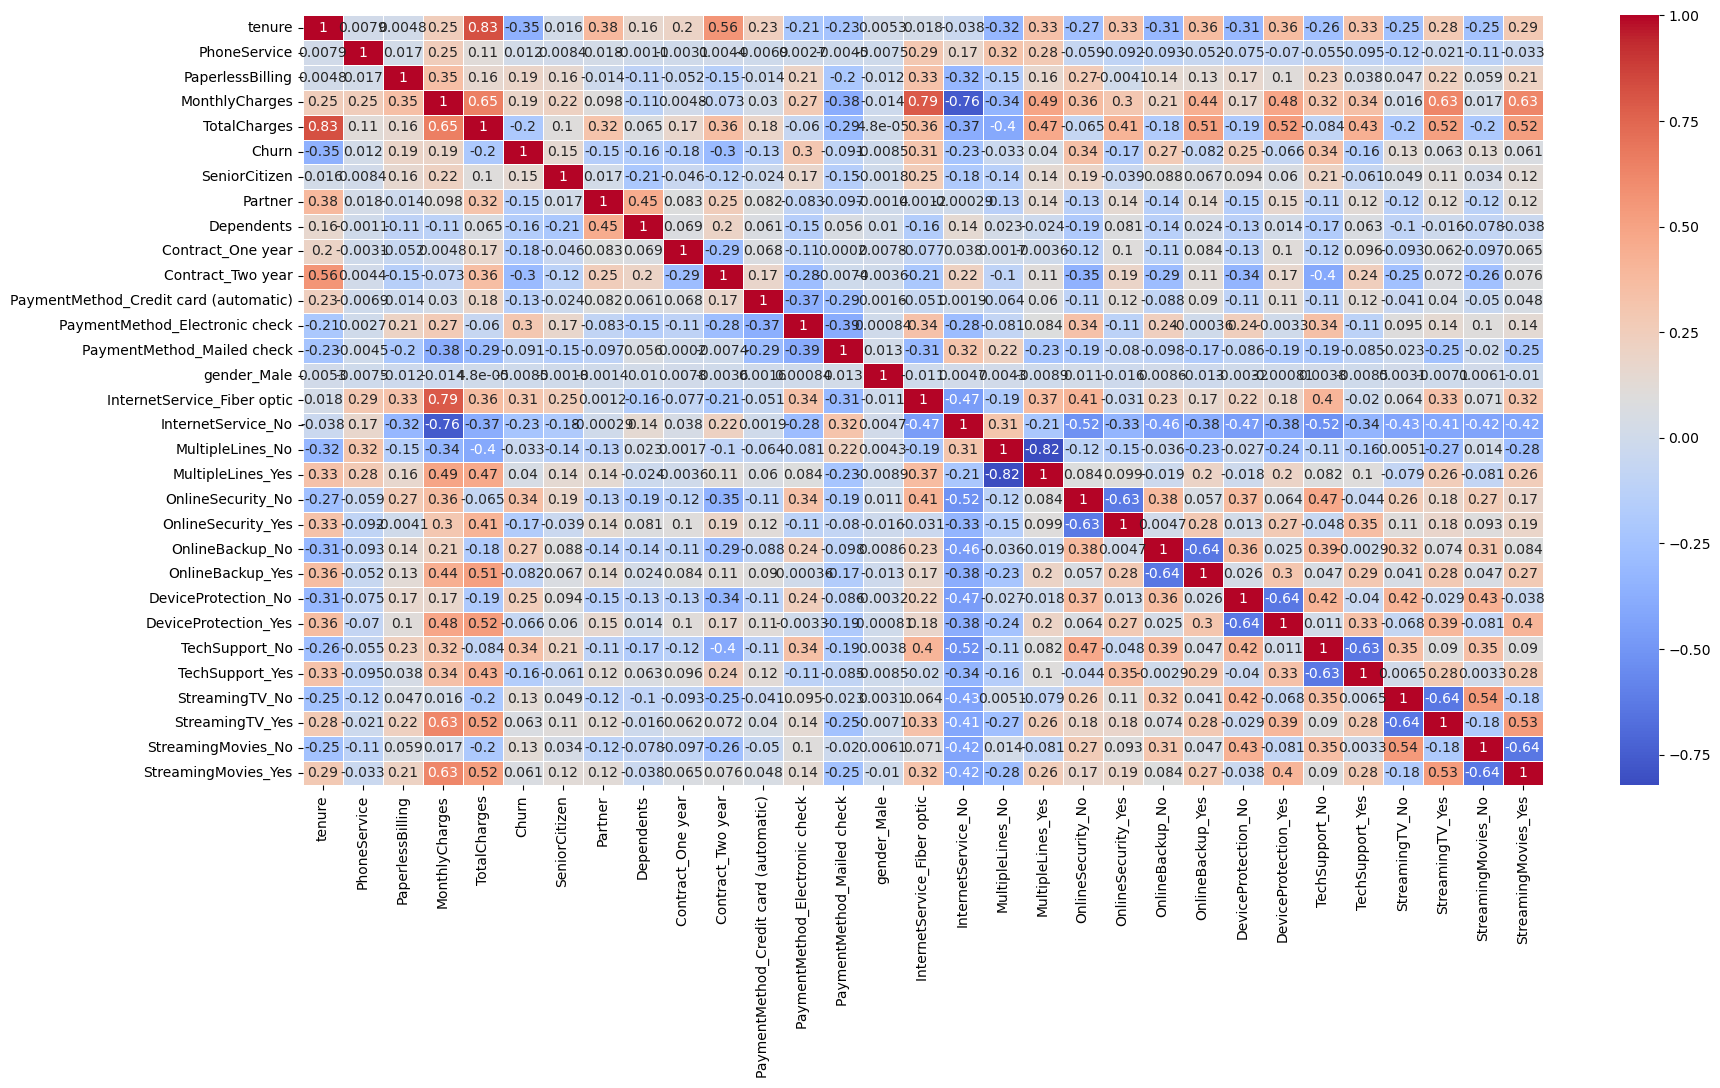

In [167]:
plt.figure(figsize=(20,10))
sns.heatmap(telecom.corr(numeric_only=True), annot=True, cmap="coolwarm", linewidths=0.5)
plt.show()


#### Dropping highly correlated dummy variables

In [168]:
X_test = X_test.drop(
    ['MultipleLines_No', 'OnlineSecurity_No', 'OnlineBackup_No', 'DeviceProtection_No', 'TechSupport_No',
     'StreamingTV_No', 'StreamingMovies_No'],
    axis=1
)

X_train = X_train.drop(
    ['MultipleLines_No', 'OnlineSecurity_No', 'OnlineBackup_No', 'DeviceProtection_No', 'TechSupport_No',
     'StreamingTV_No', 'StreamingMovies_No'],
    axis=1
)


#### Checking the Correlation Matrix

After dropping highly correlated variables now let's check the correlation matrix again.

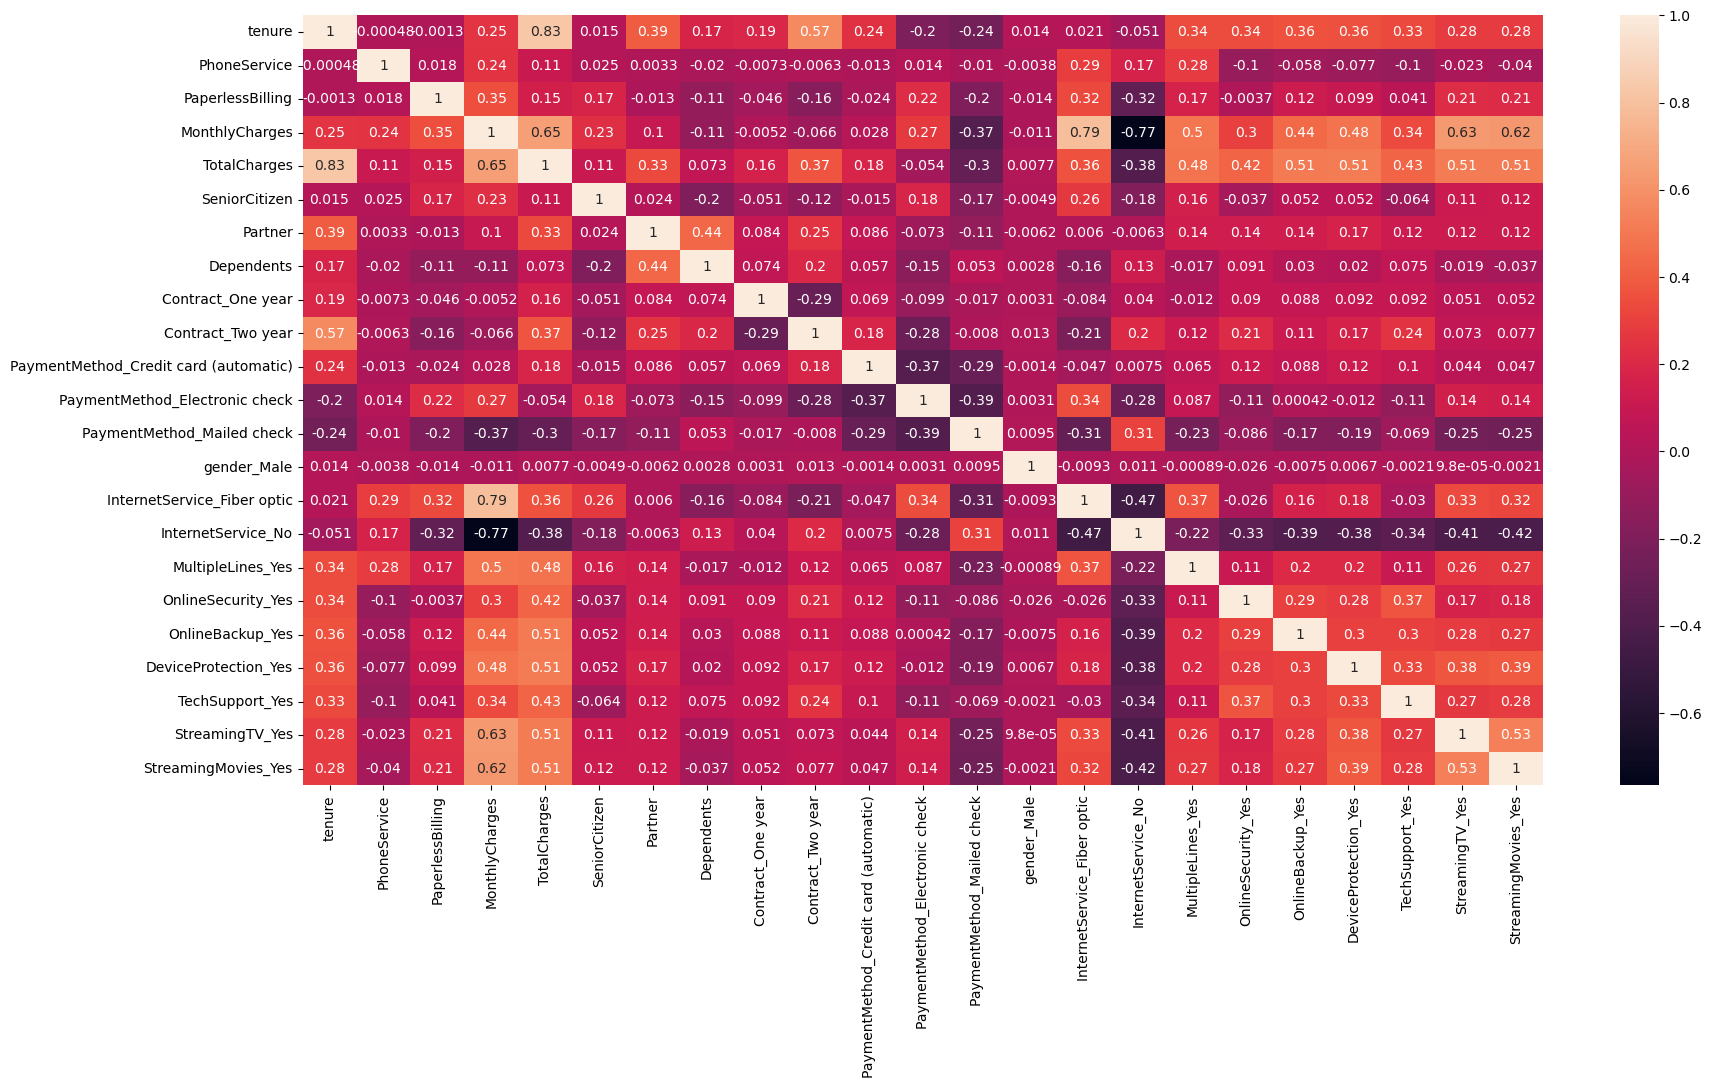

In [169]:
plt.figure(figsize = (20,10))
sns.heatmap(X_train.corr(),annot = True)
plt.show()

### Step 7: Model Building
Let's start by splitting our data into a training set and a test set.

#### Running Your First Training Model

In [170]:
import statsmodels.api as sm

In [171]:
# Ensure target is numeric
y_train = y_train.astype(int)

# Handle categorical features
X_train = pd.get_dummies(X_train, drop_first=True)

# Convert everything to float
X_train = X_train.apply(pd.to_numeric, errors='coerce').astype(float)

# Drop any column that turned into NaN (in case some bad values exist)
X_train = X_train.dropna(axis=1, how='any')

# Add constant
X_train_sm = sm.add_constant(X_train)

# Fit model
logm1 = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())
result = logm1.fit()

print(result.summary())


                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4898
Model Family:                Binomial   Df Model:                           23
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2004.7
Date:                Tue, 02 Sep 2025   Deviance:                       4009.4
Time:                        10:13:51   Pearson chi2:                 6.07e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2844
Covariance Type:            nonrobust                                         
                                            coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

### Step 8: Feature Selection Using RFE

In [172]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [173]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

# define sklearn logistic regression model
logreg = LogisticRegression(max_iter=1000, solver='liblinear')

# run RFE (select top 15 features)
rfe = RFE(estimator=logreg, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

print("Selected features:")
print(X_train.columns[rfe.support_])


Selected features:
Index(['tenure', 'PhoneService', 'PaperlessBilling', 'TotalCharges',
       'SeniorCitizen', 'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Mailed check',
       'InternetService_Fiber optic', 'InternetService_No',
       'MultipleLines_Yes', 'OnlineSecurity_Yes', 'TechSupport_Yes',
       'StreamingTV_Yes'],
      dtype='object')


In [174]:
rfe.support_

array([ True,  True,  True, False,  True,  True, False, False,  True,
        True,  True, False,  True, False,  True,  True,  True,  True,
       False, False,  True,  True, False])

In [175]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('tenure', np.True_, np.int64(1)),
 ('PhoneService', np.True_, np.int64(1)),
 ('PaperlessBilling', np.True_, np.int64(1)),
 ('MonthlyCharges', np.False_, np.int64(6)),
 ('TotalCharges', np.True_, np.int64(1)),
 ('SeniorCitizen', np.True_, np.int64(1)),
 ('Partner', np.False_, np.int64(8)),
 ('Dependents', np.False_, np.int64(4)),
 ('Contract_One year', np.True_, np.int64(1)),
 ('Contract_Two year', np.True_, np.int64(1)),
 ('PaymentMethod_Credit card (automatic)', np.True_, np.int64(1)),
 ('PaymentMethod_Electronic check', np.False_, np.int64(3)),
 ('PaymentMethod_Mailed check', np.True_, np.int64(1)),
 ('gender_Male', np.False_, np.int64(9)),
 ('InternetService_Fiber optic', np.True_, np.int64(1)),
 ('InternetService_No', np.True_, np.int64(1)),
 ('MultipleLines_Yes', np.True_, np.int64(1)),
 ('OnlineSecurity_Yes', np.True_, np.int64(1)),
 ('OnlineBackup_Yes', np.False_, np.int64(2)),
 ('DeviceProtection_Yes', np.False_, np.int64(7)),
 ('TechSupport_Yes', np.True_, np.int64(1)),
 ('S

In [176]:
col = X_train.columns[rfe.support_]

In [177]:
X_train.columns[~rfe.support_]

Index(['MonthlyCharges', 'Partner', 'Dependents',
       'PaymentMethod_Electronic check', 'gender_Male', 'OnlineBackup_Yes',
       'DeviceProtection_Yes', 'StreamingMovies_Yes'],
      dtype='object')

##### Assessing the model with StatsModels

In [178]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4906
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2011.8
Date:                Tue, 02 Sep 2025   Deviance:                       4023.5
Time:                        10:13:51   Pearson chi2:                 6.22e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2823
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -1.0343      0.171     -6.053      0.000      -1.369      -0.699
tenure                                   -1.5386      0.184     -8.381      0.000      -1.898      -1.179
PhoneService                             -0.5231      0.161     -3.256      0.001      -0.838      -0.208
PaperlessBilling                          0.3397      0.090      3.789      0.000       0.164       0.515
TotalCharges                              0.7116      0.188      3.794      0.000       0.344       1.079
SeniorCitizen                             0.4294      0.100      4.312      0.000       0.234       0.625
Contract_One year                        -0.6813      0.128     -5.334      0.000      -0.932      -0.431
Contract_Two year                        -1.2680      0.211     -6.011      0.000      -1.681      -0.855
PaymentMethod_Credit card (automatic)    -0.3775      0.113     -3.352      0.001      -0.598      -0.157
PaymentMethod_Mailed check               -0.3760      0.111     -3.389      0.001      -0.594      -0.159
InternetService_Fiber optic               0.7421      0.117      6.317      0.000       0.512       0.972
InternetService_No                       -0.9385      0.166     -5.650      0.000      -1.264      -0.613
MultipleLines_Yes                         0.2086      0.096      2.181      0.029       0.021       0.396
OnlineSecurity_Yes                       -0.4049      0.102     -3.968      0.000      -0.605      -0.205
TechSupport_Yes                          -0.3967      0.102     -3.902      0.000      -0.596      -0.197
StreamingTV_Yes                           0.2747      0.094      2.911      0.004       0.090       0.460
=========================================================================================================
"""

In [179]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

879     0.225111
5790    0.274893
6498    0.692126
880     0.504909
2784    0.645261
3874    0.417544
5387    0.420131
6623    0.809427
4465    0.223211
5364    0.512246
dtype: float64

In [180]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.22511138, 0.27489289, 0.69212611, 0.50490896, 0.6452606 ,
       0.41754449, 0.42013086, 0.80942651, 0.2232105 , 0.51224637])

##### Creating a dataframe with the actual churn flag and the predicted probabilities

In [181]:
y_train_pred_final = pd.DataFrame({'Churn':y_train.values, 'Churn_Prob':y_train_pred})
y_train_pred_final['CustID'] = y_train.index
y_train_pred_final.head()

,Churn,Churn_Prob,CustID
0,0,0.225111,879
1,0,0.274893,5790
2,1,0.692126,6498
3,1,0.504909,880
4,1,0.645261,2784


##### Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0

In [182]:
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Churn,Churn_Prob,CustID,predicted
0,0,0.225111,879,0
1,0,0.274893,5790,0
2,1,0.692126,6498,1
3,1,0.504909,880,1
4,1,0.645261,2784,1


In [183]:
from sklearn import metrics

In [184]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted )
print(confusion)

[[3270  365]
 [ 579  708]]


In [185]:
# Predicted     not_churn    churn
# Actual
# not_churn        3270      365
# churn            579       708  

In [186]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_fixnal.Churn, y_train_pred_final.predicted))

0.8082080455099553


#### Checking VIFs

In [187]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [188]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,PhoneService,8.86
3,TotalCharges,7.37
0,tenure,6.88
9,InternetService_Fiber optic,3.97
6,Contract_Two year,3.28
10,InternetService_No,3.25
2,PaperlessBilling,2.68
11,MultipleLines_Yes,2.53
14,StreamingTV_Yes,2.34
13,TechSupport_Yes,2.08


There are a few variables with high VIF. It's best to drop these variables as they aren't helping much with prediction and unnecessarily making the model complex. The variable 'PhoneService' has the highest VIF. So let's start by dropping that.

In [189]:
col = col.drop('PhoneService', 1)
col

Index(['tenure', 'PaperlessBilling', 'TotalCharges', 'SeniorCitizen',
       'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Mailed check',
       'InternetService_Fiber optic', 'InternetService_No',
       'MultipleLines_Yes', 'OnlineSecurity_Yes', 'TechSupport_Yes',
       'StreamingTV_Yes'],
      dtype='object')

In [190]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4907
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2017.0
Date:                Tue, 02 Sep 2025   Deviance:                       4034.0
Time:                        10:13:52   Pearson chi2:                 5.94e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2808
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -1.3885      0.133    -10.437      0.000      -1.649      -1.128
tenure                                   -1.4138      0.179     -7.884      0.000      -1.765      -1.062
PaperlessBilling                          0.3425      0.089      3.829      0.000       0.167       0.518
TotalCharges                              0.5936      0.184      3.225      0.001       0.233       0.954
SeniorCitizen                             0.4457      0.099      4.486      0.000       0.251       0.640
Contract_One year                        -0.6905      0.128     -5.411      0.000      -0.941      -0.440
Contract_Two year                        -1.2646      0.211     -6.002      0.000      -1.678      -0.852
PaymentMethod_Credit card (automatic)    -0.3785      0.113     -3.363      0.001      -0.599      -0.158
PaymentMethod_Mailed check               -0.3769      0.111     -3.407      0.001      -0.594      -0.160
InternetService_Fiber optic               0.6241      0.111      5.645      0.000       0.407       0.841
InternetService_No                       -1.0940      0.158     -6.919      0.000      -1.404      -0.784
MultipleLines_Yes                         0.1607      0.094      1.712      0.087      -0.023       0.345
OnlineSecurity_Yes                       -0.4094      0.102     -4.016      0.000      -0.609      -0.210
TechSupport_Yes                          -0.4085      0.101     -4.025      0.000      -0.607      -0.210
StreamingTV_Yes                           0.3077      0.094      3.277      0.001       0.124       0.492
=========================================================================================================
"""

In [191]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [192]:
y_train_pred[:10]

array([0.25403236, 0.22497676, 0.69386521, 0.51008735, 0.65172434,
       0.45441958, 0.3272777 , 0.80583357, 0.17618503, 0.50403034])

In [193]:
y_train_pred_final['Churn_Prob'] = y_train_pred

In [194]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,CustID,predicted
0,0,0.254032,879,0
1,0,0.224977,5790,0
2,1,0.693865,6498,1
3,1,0.510087,880,1
4,1,0.651724,2784,1


In [195]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted))

0.8051605038602194


So overall the accuracy hasn't dropped much.

##### Let's check the VIFs again

In [196]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,TotalCharges,7.30
0,tenure,6.79
5,Contract_Two year,3.16
8,InternetService_Fiber optic,2.94
9,InternetService_No,2.53
1,PaperlessBilling,2.52
13,StreamingTV_Yes,2.31
10,MultipleLines_Yes,2.27
12,TechSupport_Yes,2.00
4,Contract_One year,1.83


In [197]:
# Let's drop TotalCharges since it has a high VIF
col = col.drop('TotalCharges')
col

Index(['tenure', 'PaperlessBilling', 'SeniorCitizen', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Mailed check', 'InternetService_Fiber optic',
       'InternetService_No', 'MultipleLines_Yes', 'OnlineSecurity_Yes',
       'TechSupport_Yes', 'StreamingTV_Yes'],
      dtype='object')

In [198]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4908
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2022.5
Date:                Tue, 02 Sep 2025   Deviance:                       4044.9
Time:                        10:13:52   Pearson chi2:                 5.22e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2792
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -1.4695      0.130    -11.336      0.000      -1.724      -1.215
tenure                                   -0.8857      0.065    -13.553      0.000      -1.014      -0.758
PaperlessBilling                          0.3367      0.089      3.770      0.000       0.162       0.512
SeniorCitizen                             0.4517      0.100      4.527      0.000       0.256       0.647
Contract_One year                        -0.6792      0.127     -5.360      0.000      -0.927      -0.431
Contract_Two year                        -1.2308      0.208     -5.903      0.000      -1.639      -0.822
PaymentMethod_Credit card (automatic)    -0.3827      0.113     -3.399      0.001      -0.603      -0.162
PaymentMethod_Mailed check               -0.3393      0.110     -3.094      0.002      -0.554      -0.124
InternetService_Fiber optic               0.7914      0.098      8.109      0.000       0.600       0.983
InternetService_No                       -1.1205      0.157     -7.127      0.000      -1.429      -0.812
MultipleLines_Yes                         0.2166      0.092      2.355      0.019       0.036       0.397
OnlineSecurity_Yes                       -0.3739      0.101     -3.684      0.000      -0.573      -0.175
TechSupport_Yes                          -0.3611      0.101     -3.591      0.000      -0.558      -0.164
StreamingTV_Yes                           0.3995      0.089      4.465      0.000       0.224       0.575
=========================================================================================================
"""

In [199]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [200]:
y_train_pred[:10]

array([0.28219274, 0.2681923 , 0.68953115, 0.53421409, 0.67433213,
       0.42980951, 0.31009304, 0.81248467, 0.20462744, 0.50431479])

In [201]:
y_train_pred_final['Churn_Prob'] = y_train_pred

In [202]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,CustID,predicted
0,0,0.282193,879,0
1,0,0.268192,5790,0
2,1,0.689531,6498,1
3,1,0.534214,880,1
4,1,0.674332,2784,1


In [203]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted))

0.804754164973588


The accuracy is still practically the same.

##### Let's now check the VIFs again

In [204]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,Contract_Two year,3.07
7,InternetService_Fiber optic,2.60
1,PaperlessBilling,2.44
9,MultipleLines_Yes,2.24
12,StreamingTV_Yes,2.17
8,InternetService_No,2.12
0,tenure,2.04
11,TechSupport_Yes,1.98
3,Contract_One year,1.82
10,OnlineSecurity_Yes,1.78


All variables have a good value of VIF. So we need not drop any more variables and we can proceed with making predictions using this model only

In [205]:
# Let's take a look at the confusion matrix again 
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted )
confusion

array([[3269,  366],
       [ 595,  692]])

In [206]:
# Actual/Predicted     not_churn    churn
        # not_churn        3269      366
        # churn            595       692  

In [207]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted)

0.804754164973588

## Metrics beyond simply accuracy

In [208]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [209]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

np.float64(0.5376845376845377)

In [210]:
# Let us calculate specificity
TN / float(TN+FP)

np.float64(0.8993122420907841)

In [211]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.10068775790921596


In [212]:
# positive predictive value 
print (TP / float(TP+FP))

0.6540642722117203


In [213]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8460144927536232


### Step 9: Plotting the ROC Curve

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [214]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [215]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Churn, y_train_pred_final.Churn_Prob, drop_intermediate = False )

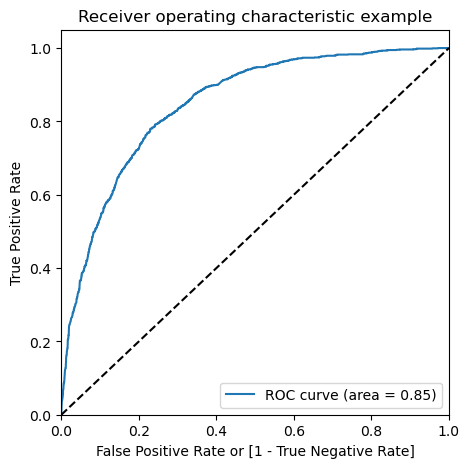

In [216]:
draw_roc(y_train_pred_final.Churn, y_train_pred_final.Churn_Prob)

### Step 10: Finding Optimal Cutoff Point

Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [217]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,CustID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.282193,879,0,1,1,1,0,0,0,0,0,0,0
1,0,0.268192,5790,0,1,1,1,0,0,0,0,0,0,0
2,1,0.689531,6498,1,1,1,1,1,1,1,1,0,0,0
3,1,0.534214,880,1,1,1,1,1,1,1,0,0,0,0
4,1,0.674332,2784,1,1,1,1,1,1,1,1,0,0,0


In [218]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.261479  1.000000  0.000000
0.1   0.1  0.619667  0.946387  0.503989
0.2   0.2  0.722674  0.850039  0.677579
0.3   0.3  0.771434  0.780109  0.768363
0.4   0.4  0.795002  0.671329  0.838790
0.5   0.5  0.804754  0.537685  0.899312
0.6   0.6  0.800284  0.385392  0.947180
0.7   0.7  0.779764  0.205128  0.983219
0.8   0.8  0.749289  0.050505  0.996699
0.9   0.9  0.738521  0.000000  1.000000


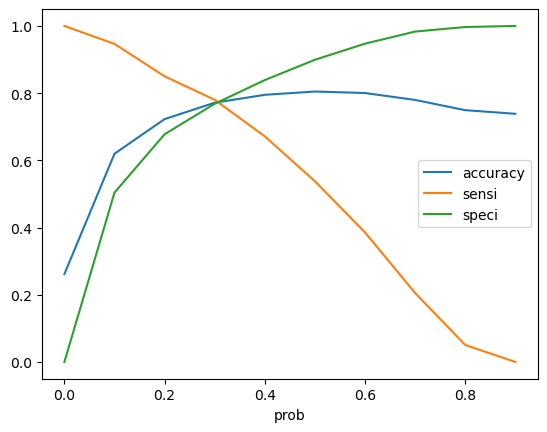

In [219]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the curve above, 0.3 is the optimum point to take it as a cutoff probability.

In [220]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,Churn,Churn_Prob,CustID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.282193,879,0,1,1,1,0,0,0,0,0,0,0,0
1,0,0.268192,5790,0,1,1,1,0,0,0,0,0,0,0,0
2,1,0.689531,6498,1,1,1,1,1,1,1,1,0,0,0,1
3,1,0.534214,880,1,1,1,1,1,1,1,0,0,0,0,1
4,1,0.674332,2784,1,1,1,1,1,1,1,1,0,0,0,1


In [221]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.final_predicted)

0.771434376269809

In [222]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.final_predicted )
confusion2

array([[2793,  842],
       [ 283, 1004]])

In [223]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [224]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

np.float64(0.7801087801087802)

In [225]:
# Let us calculate specificity
TN / float(TN+FP)

np.float64(0.768363136176066)

In [226]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.23163686382393398


In [227]:
# Positive predictive value 
print (TP / float(TP+FP))

0.5438786565547129


In [228]:
# Negative predictive value
print (TN / float(TN+ FN))

0.907997399219766


## Precision and Recall

In [229]:
#Looking at the confusion matrix again

In [230]:
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted )
confusion

array([[3269,  366],
       [ 595,  692]])

##### Precision
TP / TP + FP

In [231]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

np.float64(0.6540642722117203)

##### Recall
TP / TP + FN

In [232]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

np.float64(0.5376845376845377)

Using sklearn utilities for the same

In [233]:
from sklearn.metrics import precision_score, recall_score

In [234]:
?precision_score

Signature:
precision_score(
    y_true,
    y_pred,
    *,
    labels=None,
    pos_label=1,
    average='binary',
    sample_weight=None,
    zero_division='warn',
)
Docstring:
Compute the precision.

The precision is the ratio ``tp / (tp + fp)`` where ``tp`` is the number of
true positives and ``fp`` the number of false positives. The precision is
intuitively the ability of the classifier not to label as positive a sample
that is negative.

The best value is 1 and the worst value is 0.

Support beyond term:`binary` targets is achieved by treating :term:`multiclass`
and :term:`multilabel` data as a collection of binary problems, one for each
label. For the :term:`binary` case, setting `average='binary'` will return
precision for `pos_label`. If `average` is not `'binary'`, `pos_label` is ignored
and precision for both classes are computed, then averaged or both returned (when
`average=None`). Similarly, for :term:`multiclass` and :term:`multilabel` targets,
precision for all `labels` 

In [235]:
precision_score(y_train_pred_final.Churn, y_train_pred_final.predicted)

0.6540642722117203

In [236]:
recall_score(y_train_pred_final.Churn, y_train_pred_final.predicted)

0.5376845376845377

### Precision and recall tradeoff

In [237]:
from sklearn.metrics import precision_recall_curve

In [238]:
y_train_pred_final.Churn, y_train_pred_final.predicted

(0       0
 1       0
 2       1
 3       1
 4       1
        ..
 4917    0
 4918    0
 4919    0
 4920    0
 4921    0
 Name: Churn, Length: 4922, dtype: int64,
 0       0
 1       0
 2       1
 3       1
 4       1
        ..
 4917    0
 4918    0
 4919    0
 4920    0
 4921    0
 Name: predicted, Length: 4922, dtype: int64)

In [239]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Churn, y_train_pred_final.Churn_Prob)

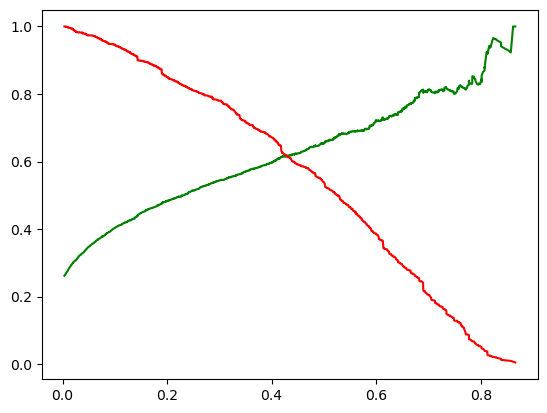

In [240]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### Step 11: Making predictions on the test set

In [241]:
X_test[['tenure','MonthlyCharges','TotalCharges']] = scaler.transform(X_test[['tenure','MonthlyCharges','TotalCharges']])

In [242]:
X_test = X_test[col]
X_test.head()

,tenure,PaperlessBilling,SeniorCitizen,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Mailed check,InternetService_Fiber optic,InternetService_No,MultipleLines_Yes,OnlineSecurity_Yes,TechSupport_Yes,StreamingTV_Yes
942,-0.347623,1,0,False,False,True,False,True,False,False,False,False,False
3730,0.999203,1,0,False,False,True,False,True,False,True,False,False,True
1761,1.040015,1,0,False,True,True,False,False,True,True,False,False,False
2283,-1.286319,1,0,False,False,False,True,True,False,False,False,False,False
1872,0.346196,0,0,False,True,False,False,False,True,False,False,False,False


In [243]:
X_test_sm = sm.add_constant(X_test)

Making predictions on the test set

In [244]:
import numpy as np

def sigmoid(z):
    z = np.asarray(z, dtype=np.float64)  # ensure proper float array
    return 1.0 / (1.0 + np.exp(-z))


In [245]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score

# Load example dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create LogisticRegression instance
model = LogisticRegression(max_iter=200)

# Fit the model on the training data
model.fit(X_train, y_train)

# Predict on the test data
predictions = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 1.00


In [246]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

# Load example data
X, y = load_iris(return_X_y=True)

# For binary classification, filter two classes only (e.g., class 0 and 1)
X = X[y != 2]
y = y[y != 2]

# Split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create logistic regression model
logreg = LogisticRegression()

# 💡 Fit the model BEFORE predicting
logreg.fit(X_train, y_train)

# Now you can safely use predict_proba
y_test_pred_proba = logreg.predict_proba(X_test)[:, 1]

# Print the first 10 predicted probabilities
print(y_test_pred_proba[:10])


[0.99881545 0.98420197 0.99695291 0.03040059 0.05730628 0.02838856
 0.00643678 0.9683098  0.02539298 0.0210692 ]


In [247]:
# Predict on the test set
y_test_pred = logreg.predict(X_test)

# Now convert to DataFrame
y_pred_1 = pd.DataFrame(y_test_pred)


In [248]:
# Let's see the head
y_pred_1.head()

,0
0,1
1,1
2,1
3,0
4,0


In [249]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [250]:
# Putting CustID to index
y_test_df['CustID'] = y_test_df.index

In [251]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [252]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [253]:
y_pred_final.head()

,0,CustID,0
0,1,0,1
1,1,1,1
2,1,2,1
3,0,3,0
4,0,4,0


In [254]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Churn_Prob'})

In [255]:
#  Remove duplicate columns
y_pred_final = y_pred_final.loc[:, ~y_pred_final.columns.duplicated()]

#  Reorder columns safely
y_pred_final = y_pred_final.reindex(columns=['CustID', 'Churn', 'Churn_Prob'])


In [256]:
# Let's see the head of y_pred_final
y_pred_final.head()

,CustID,Churn,Churn_Prob
0,0,NaN,1
1,1,NaN,1
2,2,NaN,1
3,3,NaN,0
4,4,NaN,0


In [257]:
y_pred_final['final_predicted'] = y_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.42 else 0)

In [258]:
y_pred_final.head()

,CustID,Churn,Churn_Prob,final_predicted
0,0,NaN,1,1
1,1,NaN,1,1
2,2,NaN,1,1
3,3,NaN,0,0
4,4,NaN,0,0


In [259]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [260]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Churn_Prob, y_pred_final.final_predicted)

1.0

In [261]:
confusion2 = metrics.confusion_matrix(y_pred_final.Churn_Prob, y_pred_final.final_predicted )
confusion2

array([[12,  0],
       [ 0,  8]])

In [262]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [263]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

np.float64(1.0)

In [264]:
# Let us calculate specificity
TN / float(TN+FP)

np.float64(1.0)